<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/07_dimensional%20reduce/07_pca_math_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UCZENIE NIENADZOROWANE /  UNSUPERVISED LEARNING

#  Dimensionality reduce - PCA method

A basic library for machine learning in Python
To install the scikit-learn library, use the command below:
```
!pip install scikit-learn
```
To update to the latest version of the scikit-learn library, use the command below:
```
!pip install --upgrade scikit-learn
```

### Contents:
1. [Import libraries](#0)
2. [Data generation ](#1)
3. [Data visualization](#2)
4. [Standarization](#3)
5. [PCA- 2 komponents](#4)
6. [PCA- 3 komponents](#5)
7. [MINST - dataset](#6)
8. [CIFAR - dataset](#7)
9.[Wine - dataset](#8)


### <a name='0'></a> Import libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=8, suppress=True, edgeitems=5, linewidth=200)


### <a name='1'></a> Data generation

In [2]:
from sklearn.datasets import load_breast_cancer


raw_data=load_breast_cancer()
all_data=raw_data.copy()
target=all_data['target']
data=all_data['data']

data[:3]


array([[  17.99    ,   10.38    ,  122.8     , 1001.      ,    0.1184  ,    0.2776  ,    0.3001  ,    0.1471  ,    0.2419  ,    0.07871 ,    1.095   ,    0.9053  ,    8.589   ,  153.4     ,
           0.006399,    0.04904 ,    0.05373 ,    0.01587 ,    0.03003 ,    0.006193,   25.38    ,   17.33    ,  184.6     , 2019.      ,    0.1622  ,    0.6656  ,    0.7119  ,    0.2654  ,
           0.4601  ,    0.1189  ],
       [  20.57    ,   17.77    ,  132.9     , 1326.      ,    0.08474 ,    0.07864 ,    0.0869  ,    0.07017 ,    0.1812  ,    0.05667 ,    0.5435  ,    0.7339  ,    3.398   ,   74.08    ,
           0.005225,    0.01308 ,    0.0186  ,    0.0134  ,    0.01389 ,    0.003532,   24.99    ,   23.41    ,  158.8     , 1956.      ,    0.1238  ,    0.1866  ,    0.2416  ,    0.186   ,
           0.275   ,    0.08902 ],
       [  19.69    ,   21.25    ,  130.      , 1203.      ,    0.1096  ,    0.1599  ,    0.1974  ,    0.1279  ,    0.2069  ,    0.05999 ,    0.7456  ,    0.7869  ,    4.5

In [3]:
target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [4]:
data.shape

(569, 30)

### <a name='2'></a> Standarization

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std[:3]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,  3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,  2.48973393, -0.56526506,  2.83303087,  2.48757756,
        -0.21400165,  1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,  1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,  2.61666502,  2.10952635,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825, -0.82696245, -0.48707167, -0.02384586,  0.54814416,  0.00139236, -0.86865246,  0.4992546 , -0.8762436 ,  0.26332697,  0.74240195,
        -0.60535085, -0.69292627, -0.44078006,  0.26016207, -0.80545038, -0.09944374,  1.80592744, -0.36920322,  1.53512599,  1.89048899, -0.37561196, -0.43044422, -0.14674897,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044,  1.05292554,  1.36347845,  2.03723076,  0.93968482, -0.39800791,  1.22867595, -0.78008338,  0.850

### <a name='4'></a> PCA implementation - 2 components

In [6]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
data_pca=pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

In [7]:
pca_2=pd.DataFrame(data={'pca_1':data_pca[:,0], 'pca_2':data_pca[:,1], 'class':target})
pca_2.head()

,pca_1,pca_2,class
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [8]:
pca_2.replace(0,'Benign', inplace=True)
pca_2.replace(1,'Malignat', inplace=True)
pca_2.head()

,pca_1,pca_2,class
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign


In [9]:
results=pd.DataFrame(data={'explained_variance_ratio':pca.explained_variance_ratio_})
results['cumulative']=results['explained_variance_ratio'].cumsum()
results['component']=results.index+1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2


In [10]:
fig=go.Figure(data=[go.Bar(x=results['component'],y=results['explained_variance_ratio'],name='explained_variance_ratio'),go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative') ],layout=go.Layout(title='PCA-2 components',width=900, template='plotly_dark'))
fig.show()

In [11]:
px.scatter(pca_2, 'pca_1', 'pca_2', color=pca_2['class'], width=950, template='plotly_dark')

### <a name='4'></a> PCA implementation - 3 components

In [12]:
pca=PCA(n_components=3)
data_pca=pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928368 ,  1.94858195, -1.12317617],
       [ 2.3878017 , -3.76817567, -0.52932684],
       [ 5.73389625, -1.07517497, -0.55175664],
       [ 7.12295314, 10.2755866 , -3.23281154],
       [ 3.93530208, -1.94807143,  1.38976857]])

In [13]:
pca_3=pd.DataFrame(data={'pca_1':data_pca[:,0],'pca_2':data_pca[:,1], 'pca_3':data_pca[:,2], 'class':target})
pca_3.head()

,pca_1,pca_2,pca_3,class
0,9.192837,1.948582,-1.123176,0
1,2.387802,-3.768176,-0.529327,0
2,5.733896,-1.075175,-0.551757,0
3,7.122953,10.275587,-3.232812,0
4,3.935302,-1.948071,1.389769,0


In [14]:
pca_3.replace(0, 'Benign', inplace=True)
pca_3.replace(1, 'Malignant', inplace=True)
pca_3.head()

,pca_1,pca_2,pca_3,class
0,9.192837,1.948582,-1.123176,Benign
1,2.387802,-3.768176,-0.529327,Benign
2,5.733896,-1.075175,-0.551757,Benign
3,7.122953,10.275587,-3.232812,Benign
4,3.935302,-1.948071,1.389769,Benign


In [15]:
results=pd.DataFrame(data={'explained_variance_ratio':pca.explained_variance_ratio_})
results['cumulative']=results['explained_variance_ratio'].cumsum()
results['component']=results.index+1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2
2,0.093932,0.726364,3


In [16]:
fig=go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'), go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')], layout=go.Layout(title='PCA-3 components', width=900, template='plotly_dark'))
fig.show()

### <a name='5'></a>MNIST dataset




In [17]:
from keras.datasets import mnist
(X_train, y_train),(X_test, y_test)=mnist.load_data()

print(f'X_train shape:{X_train.shape}')
print(f'X_test shape:{X_test.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'y_test shape:{y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape:(60000, 28, 28)
X_test shape:(10000, 28, 28)
y_train shape:(60000,)
y_test shape:(10000,)


Limitation data to 5000 photos


In [18]:
X_train=X_train[:5000]
y_train=y_train[:5000]
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [19]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Data visualization

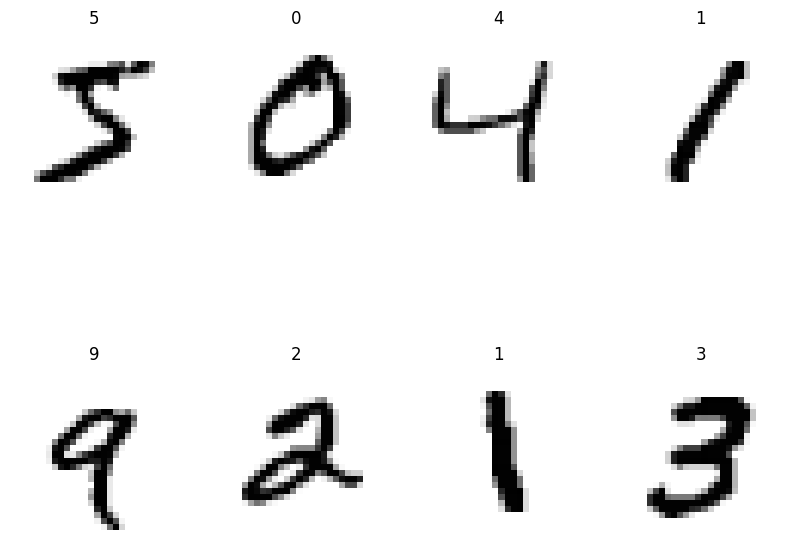

In [20]:
plt.figure(figsize=(10,8))
for i in range(8):
  plt.subplot(240+i+1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.title(y_train[i], color='black', fontsize=12)
  plt.axis('off')
plt.show()

Standarization

In [21]:
X_train=X_train /255
X_test=X_test/255
X_train.shape

(5000, 28, 28)

Flatten an image

In [22]:
X_train=X_train.reshape(-1,28*28)
X_train.shape

(5000, 784)

PCA- 3 components

In [23]:
pca=PCA(n_components=3)
X_train_pca=pca.fit_transform(X_train)
X_train_pca[:5]

array([[ 0.45548905,  1.44629319, -0.12692449],
       [ 4.06777688,  1.51561019,  2.16279975],
       [-0.11157481, -1.77795056, -0.61832932],
       [-3.43948381,  2.33766045,  0.61057799],
       [-1.40301212, -2.69511271, -0.17231399]])

Explained variance

In [24]:
 results=pd.DataFrame(data={'explained_variance_ratio':pca.explained_variance_ratio_})
 results["cumulative"]=results['explained_variance_ratio']
 results['component']=results.index+1
 results



,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.074045,2
2,0.061277,0.061277,3


In [25]:
fig=go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance'),
                    go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
              layout=go.Layout(title="PCA- 3 components", width=800, template='plotly_dark'))
fig.show()

In [26]:
X_train_pca_df=pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class']=X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class
0,0.455489,1.446293,-0.126924,5.0
1,4.067777,1.515610,2.162800,0.0
2,-0.111575,-1.777951,-0.618329,4.0
3,-3.439484,2.337660,0.610578,1.0
4,-1.403012,-2.695113,-0.172314,9.0


3D visualisation of main components

In [27]:

px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class', 
              symbol='class', opacity=0.7, size_max=10, width=950, height=700, 
              template='plotly_dark', title='PCA - MNIST dataset')

In [28]:
pca=PCA(n_components=0.95)
X_train_pca=pca.fit_transform(X_train)
X_train_pca[:1]

array([[ 0.45547947,  1.44640473, -0.12655663, -2.04641254, -0.9062279 ,  0.86582045,  0.71431437,  0.38428219,  1.21694474, -0.57364445,  0.22328529, -1.81756856, -1.06965068,  2.88461682,
         0.04345995,  0.40545133, -1.35171655, -0.48809479,  0.74392129,  1.25593215,  0.49099363,  0.89711903,  0.71566793,  0.78227674, -0.24740114, -0.36422054,  1.31173026,  0.43689339,
         0.45146487, -0.15557871, -0.59054645,  0.03177077, -0.08793944, -0.15449585, -0.17571162, -0.44335786,  0.72367008, -0.35609599,  0.44318513,  1.71119188,  0.26734519, -0.84390829,
        -0.38941395, -0.15283391, -0.04403904, -0.51247248, -0.61940769, -0.19681912,  0.2109247 , -0.39944693,  0.31065904, -0.09066386,  0.13612481, -0.59260145,  0.01473146,  0.71612222,
         0.49696565,  0.61632946, -0.28841383, -0.16266513,  0.56855196, -0.12770368,  0.65453375, -0.34065393,  0.7817326 ,  0.25856926, -0.05667748, -0.24882996, -0.33123775, -0.10654711,
        -0.035182  , -0.63059981,  0.01242583, -0.

In [29]:
pca.n_components_

148

Explained variance

In [30]:
results=pd.DataFrame(data={'explained_variance_ratio':pca.explained_variance_ratio_})
results['cumulative']=results['explained_variance_ratio'].cumsum()
results['component']=results.index+1
results.head(10)

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3
3,0.054053,0.288051,4
4,0.047376,0.335427,5
5,0.044190,0.379617,6
6,0.033701,0.413318,7
7,0.029124,0.442442,8
8,0.027727,0.470170,9
9,0.023302,0.493472,10


In [31]:
fig=go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variacne_ratio'),
                    go.Scatter(x=results['component'],y=results['cumulative'], name='cumulative')],
                    layout=go.Layout(title='PCA-3 component', width=900, template='plotly_dark'))
fig.show()

### <a name='6'></a>CIFAR dataset


In [79]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(X_train, y_train),(X_test, y_test)=cifar10.load_data()
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [80]:
# We use only first 5000 pictures

X_train=X_train[:5000]
X_test=X_test[:5000]
X_train[0].shape

(32, 32, 3)

In [81]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Visualisation

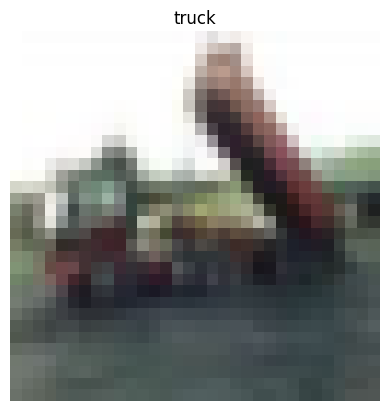

In [82]:
targets={0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
plt.imshow(X_train[2])
plt.title(targets[y_train[1][0]], color='black', fontsize=12)
plt.axis('off')
plt.show()

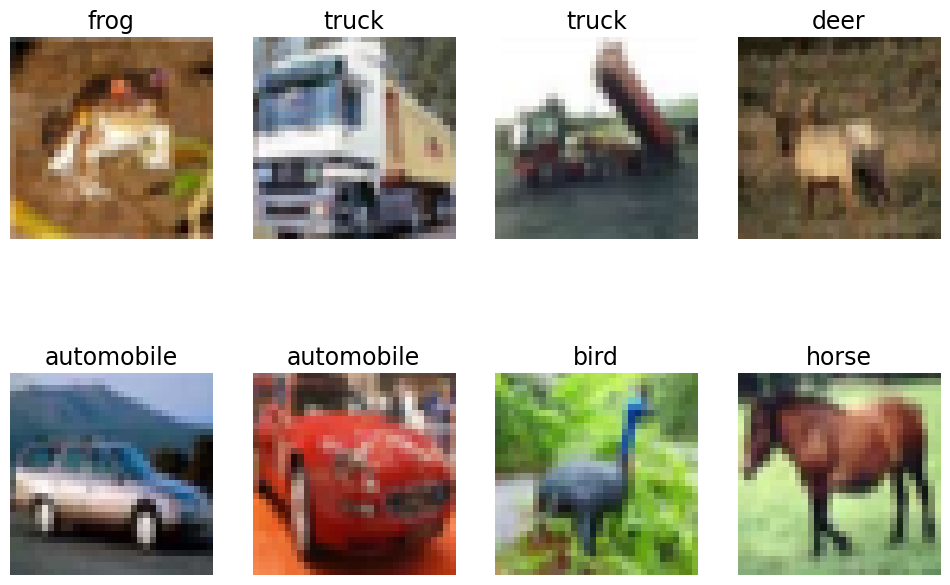

In [83]:
plt.figure(figsize=(12, 8))

for i in range(8):
    plt.subplot(240+i+1)
    plt.imshow(X_train[i])
    plt.title(targets[y_train[i][0]], color='black', fontsize=17)
    plt.axis('off')
plt.show()

Standarization

In [84]:
X_train=X_train /255
X_test=X_test/255
X_train.shape

(5000, 32, 32, 3)

In [85]:
#Flatten an image
X_train=X_train.reshape(-1, 32*32*3)
X_train.shape

(5000, 3072)

In [86]:
X_train[:5]

array([[0.23137255, 0.24313725, 0.24705882, 0.16862745, 0.18039216, ..., 0.4627451 , 0.32941176, 0.48235294, 0.36078431, 0.28235294],
       [0.60392157, 0.69411765, 0.73333333, 0.49411765, 0.5372549 , ..., 0.5254902 , 0.55686275, 0.56078431, 0.52156863, 0.56470588],
       [1.        , 1.        , 1.        , 0.99215686, 0.99215686, ..., 0.33333333, 0.3254902 , 0.31372549, 0.3372549 , 0.32941176],
       [0.10980392, 0.09803922, 0.03921569, 0.14509804, 0.13333333, ..., 0.21960784, 0.14509804, 0.28235294, 0.25490196, 0.18039216],
       [0.66666667, 0.70588235, 0.77647059, 0.65882353, 0.69803922, ..., 0.29411765, 0.30588235, 0.28627451, 0.30196078, 0.31372549]])

PCA- 3 components

In [87]:
pca=PCA(n_components=3)
X_train_pca=pca.fit_transform(X_train)
X_train_pca[:5]

array([[ -6.50231806,   2.55047994,   1.57722183],
       [  0.87089031,  -0.87150011,   6.21631446],
       [  8.11101293, -11.19478983,  -2.69116865],
       [-10.35215989,  -0.2394238 ,   1.25219622],
       [ -2.46193879,  -4.83469707,   1.24786344]])

Explained Variance

In [88]:
results=pd.DataFrame(data={'explained_variance_ratio':pca.explained_variance_ratio_})
results['cumulative']=results['explained_variance_ratio'].cumsum()
results['component']=results.index+1
results.head(10)

,explained_variance_ratio,cumulative,component
0,0.291944,0.291944,1
1,0.112451,0.404395,2
2,0.066359,0.470754,3


In [89]:
fig=go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                    go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
              layout=go.Layout(title="PCA-3 components", width=900, template='plotly_dark'))
fig.show()

In [122]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train[:5000]], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['name'] = X_train_pca_df['class'].map(targets)
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()



,pca_1,pca_2,pca_3,class,name
0,-6.502318,2.550480,1.577222,6.0,frog
1,0.870890,-0.871500,6.216314,9.0,truck
2,8.111013,-11.194790,-2.691169,9.0,truck
3,-10.352160,-0.239424,1.252196,4.0,deer
4,-2.461939,-4.834697,1.247863,1.0,automobile


3D Visualization  of the main components

In [123]:

px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='name', 
              symbol='name', opacity=0.7, size_max=10, width=950, height=700,
              title='PCA - CIFAR dataset', template='plotly_dark')

PCA - 0,95% variance

In [124]:
pca=PCA(n_components=0.95)
X_train_pca=pca.fit_transform(X_train)
X_train_pca[:5]

array([[ -6.50231806,   2.55047994,   1.57722247,   2.81713801,  -4.68899697, ...,   0.01060483,  -0.51894314,  -0.21034571,   0.09381301,  -0.02899773],
       [  0.87089031,  -0.8715001 ,   6.21631617,  -1.60831029,  -1.39934685, ...,   0.42913952,   0.37637881,  -0.31805693,   0.27442389,  -0.6622632 ],
       [  8.11101293, -11.19478984,  -2.69116895,  -2.42498222,  -1.47601509, ...,   0.22912872,   0.03754957,  -0.27443179,   0.25238656,   0.06046926],
       [-10.35215989,  -0.23942378,   1.25219222,   1.23661018,  -1.66750043, ...,  -0.12817115,   0.01166124,   0.00437197,   0.05749179,   0.02314623],
       [ -2.46193879,  -4.83469706,   1.24786125,  -2.96845352,   1.50201183, ...,   0.08135348,   0.17599571,   0.09382676,   0.22999009,  -0.03351537]])

In [125]:
pca.n_components_

203

In [126]:
pca.explained_variance_ratio_

array([0.29194362, 0.11245143, 0.06635923, 0.03713648, 0.03544329, 0.02880065, 0.02650439, 0.02191009, 0.02109256, 0.01453335, 0.01347205, 0.01054243, 0.01049148, 0.01010625, 0.00905868, 0.0085379 ,
       0.00753817, 0.00705503, 0.00671367, 0.00655829, 0.00618409, 0.00579233, 0.00505727, 0.00491706, 0.00484159, 0.00471548, 0.00458267, 0.00445526, 0.00413721, 0.00396834, 0.00366096, 0.00342019,
       0.00322839, 0.00316274, 0.00308899, 0.00302092, 0.0027151 , 0.00258856, 0.00250485, 0.00247979, 0.00246923, 0.00236036, 0.00232186, 0.00220402, 0.00212545, 0.00211816, 0.00193402, 0.00190658,
       0.00184409, 0.00180966, 0.00176211, 0.00174064, 0.00171535, 0.00167766, 0.00166565, 0.00162609, 0.0015904 , 0.00158296, 0.0015299 , 0.00150127, 0.00147767, 0.00144595, 0.00140184, 0.00138416,
       0.00135009, 0.00131282, 0.00129367, 0.0012703 , 0.00124217, 0.00122759, 0.00118275, 0.00117326, 0.00114846, 0.00111859, 0.00110554, 0.00110204, 0.00108721, 0.00107931, 0.00104182, 0.00103156,
     

Explained variance

In [127]:
results=pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative']=results['explained_variance_ratio'].cumsum()
results['component']=results.index+1
results

,explained_variance_ratio,cumulative,component
0,0.291944,0.291944,1
1,0.112451,0.404395,2
2,0.066359,0.470754,3
3,0.037136,0.507891,4
4,0.035443,0.543334,5
...,...,...,...
198,0.000279,0.949025,199
199,0.000277,0.949302,200
200,0.000271,0.949574,201
201,0.000269,0.949843,202


In [128]:
fig=go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variacne_ratio'),
                           go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
              layout=go.Layout(title=f'PCA - {pca.n_components_} components', width=950, template='plotly_dark'))
fig.show()

### <a name='7'></a>Wine dataset

In [129]:
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df = df_raw.copy()
df.head()
     

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [130]:
data=df.iloc[:,1:]
target=df.iloc[:,0]
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [131]:
target.value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

Split dataset onto training and testing set


In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(data, target)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (133, 13)
X_test shape: (45, 13)


Standarization

In [142]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)
X_train_std[:5]

array([[-0.0082425 , -0.29342162,  3.04417161,  1.61962402,  1.66725808,  0.51316275,  0.60087981,  1.09963932,  0.51819061, -0.65971456,  0.78245244,  0.79470093,  0.17619047],
       [ 0.65200039,  0.16125611,  1.14452876,  1.47266673,  0.35841646, -1.24856519, -1.2761601 ,  0.39010855, -0.12941951,  1.54272416, -0.97374869, -1.17853967, -0.06944195],
       [-0.15773146,  0.35856909,  1.18037107,  0.4439657 , -0.26156115, -1.26487749, -1.62300443,  1.6317874 , -1.47576687, -0.21749262, -0.83865629, -0.45971631, -0.53000272],
       [ 0.55234109,  0.62451267,  0.89363253,  1.32570944,  1.59837168, -1.49324963, -0.53146492, -1.11764433, -0.62364829,  1.5167111 , -1.64921066, -1.88326846, -0.83704324],
       [-0.85534659, -0.65373228, -0.25332165,  1.47266673, -0.81265235, -0.15564138,  0.36624982,  0.4787999 ,  0.48410586, -1.29269892, -0.29828671,  0.20272875, -1.32216726]])

PCA

In [143]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.fit_transform(X_test_std)
X_train_std.shape

(133, 13)

Explained variance

In [144]:
results=pd.DataFrame(data={'explained_variance_ratio':pca.explained_variance_ratio_})
results['cumulative']=results['explained_variance_ratio'].cumsum()
results['component']=results.index+1
results

,explained_variance_ratio,cumulative,component
0,0.377199,0.377199,1
1,0.206502,0.583701,2
2,0.119124,0.702825,3


In [145]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained variance ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative explained variance')],
                layout=go.Layout(title=f'PCA - {pca.n_components_} components', width=950, template='plotly_dark'))
fig.show()

In [146]:
X_train_pca_df = pd.DataFrame(data=np.c_[X_train_pca, y_train], columns=['pca1', 'pca2', 'pca3', 'target'])
X_train_pca_df.head()

,pca1,pca2,pca3,target
0,-0.927634,1.135876,3.646408,1.0
1,2.292154,2.104235,0.614513,3.0
2,2.907960,0.325945,0.510070,3.0
3,2.425216,2.372521,0.429508,3.0
4,0.636788,-1.918335,1.513710,2.0


In [147]:
px.scatter_3d(X_train_pca_df, x='pca1', y='pca2', z='pca3', color='target', template='plotly_dark', width=950)

In [148]:
X_train_pca[:5]

array([[-0.92763402,  1.13587637,  3.64640779],
       [ 2.2921537 ,  2.10423498,  0.61451348],
       [ 2.90795966,  0.32594527,  0.51007043],
       [ 2.42521554,  2.37252102,  0.42950819],
       [ 0.6367882 , -1.918335  ,  1.51370969]])

In [149]:
X_test_pca[:5]

array([[ 2.27139054, -1.53246172, -0.82501334],
       [-2.94859225, -0.4375048 ,  0.33198597],
       [ 0.18147746,  1.71331681, -1.02730939],
       [ 0.55320675,  0.82438499, -0.40582455],
       [ 2.39324868, -1.9612269 , -0.16585744]])